# logRegres

In [ ]:
testSet.txt  每个样本两个特征 一共两个类别

In [53]:
import numpy as np
import matplotlib.pyplot as plt


In [22]:
def loadDataSet():
    dataMat=[];labelMat=[]
    fr=open('testSet.txt')
    for line in fr.readlines():
        lineArr=line.strip().split()    #去除头，尾空格，按照空格分隔
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))   #标签转化为int类型
    return dataMat,labelMat

In [23]:
def sigmoid(inx):
    return 1.0/(1+np.exp(-inx))

In [251]:
#梯度上升
#这里对于构建的线性模型的体现就在于：dataMatin*weights
#这里是就是相当于对每个样本的各个特征进行加权求和，然后得到每个样本的输出，然后将输出拿去求损失

def gradAscent(dataMatin,classlabel):
    dataMattrix=np.mat(dataMatin)   #转为矩阵数据类型  (100,3)
    labelMat=np.mat(classlabel).transpose()      #(100,1)转为(1,100)
    
    m,n=np.shape(dataMattrix)  #获取形状
    
    lr=0.001   #学习率
    
    maxCycles=500
    weights=np.mat(np.ones((n,1)))  #(3,1)
    for k in range(maxCycles):    #进行500次迭代
        y_h=sigmoid(dataMatin*weights)   #变为(m,1)的向量
#         print("y_h shape",np.shape(y_h))  
        loss=labelMat-y_h    #求损失 (100,1)
#         print("loss :",loss[0])
#         print(type(loss[0]))
#         print(np.shape(loss))
#         print(loss[0][0].shape)
        #这里是对整个数据集求梯度
        weights=weights+lr*dataMattrix.transpose()*loss     #梯度上升  得到(n,1)的列向量
#         print(type(weights))
#     print("weights shape:",np.shape(weights))
    return weights

In [176]:
dataArr,labelMat=loadDataSet()

In [252]:
weights=gradAscent(dataArr,labelMat)

In [260]:
matrix_modle=type(weights)

In [266]:
def plotBestFit(dataMat,labelMat,weights):
    dataArr = np.array(dataMat)
#     print("w 矩阵 shape:",weights.shape)
#     weights=weights.getA()     #array需要注释
#     print("w shape",weights.shape)
#     print(type(weights))
    n = np.shape(dataArr)[0]   #样本数
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:   #‘1’类别的点
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:   #'0'类别的点
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
#     print("x shape",x.shape)
    y = (-weights[0]-weights[1]*x)/weights[2]
#     print("y shape",y.shape)
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');



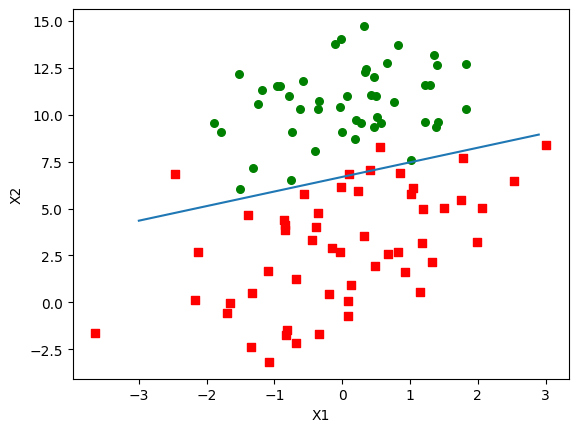

In [264]:
plotBestFit(dataArr,labelMat,weights)

In [177]:
np.shape(dataArr[0])

(3,)

In [178]:
type(dataArr)

list

In [215]:
weights33=np.ones(3)   #(3,)


In [216]:
weights33

array([1., 1., 1.])

In [245]:
type(dataArr[0])

list

In [218]:
z=dataArr[0]*weights33

In [219]:
z

array([ 1.      , -0.017612, 14.053064])

In [220]:
np.shape(z)

(3,)

In [221]:
z=sum(z)

In [222]:
z

15.035452

In [191]:
zz=labelMat[0]-z

In [192]:
zz

-15.035452

In [194]:
type(zz)

numpy.float64

In [195]:
type(0.01)

float

In [196]:
lrr=0.01

In [240]:
dataArr[0]

[1.0, -0.017612, 14.053064]

In [241]:
np.array(dataArr[0])

array([ 1.      , -0.017612, 14.053064])

In [242]:
lrr*zz

-0.15035452

In [244]:
lrr*zz*np.array(dataArr[0])

array([-0.15035452,  0.00264804, -2.11294169])

In [223]:
type(dataArr[0])

list

In [224]:
dataArr[0]

[1.0, -0.017612, 14.053064]

In [237]:

#随机梯度上升
#随机体现在每次通过一个样本求得的损失来梯度和进行权重更新（伪随机）
#这里的批量大小是1
def stocGradAscent0(dataMat,labels):
    m,n=np.shape(dataMat)    # m, 3
    dataMat=np.array(dataMat)    #由list转换为array   逆天
    lr=0.01
    weights=np.ones(n)   #(3,)
    for i in range(m):   #对每个样本
        y_h=sigmoid(sum(dataMat[i]*weights))  #点积  对应元素相乘
        loss=labels[i]-y_h   #(1,1)
        weights=weights+lr*loss*dataMat[i]
    return weights

In [238]:
weights2=stocGradAscent0(dataArr,labelMat)

In [239]:
weights2

array([ 1.01702007,  0.85914348, -0.36579921])

In [256]:
type(weights)

numpy.matrix

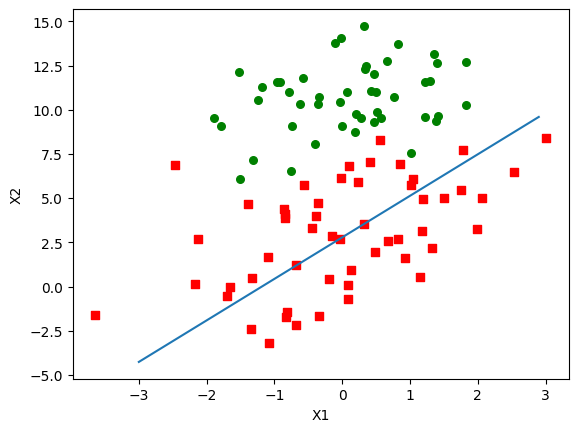

In [267]:
plotBestFit(dataArr,labelMat,weights2)